In [160]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [161]:
data=pd.read_csv('bank.csv')

In [162]:
data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [163]:
df=pd.DataFrame(data=data)

In [164]:
df.head(1)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no


In [165]:
from sklearn.preprocessing import LabelEncoder

In [166]:
le=LabelEncoder()

In [167]:
df['age']=le.fit_transform(df['age'])
df['job']=le.fit_transform(df['job'])
df['marital']=le.fit_transform(df['marital'])
df['education']=le.fit_transform(df['education'])
df['default']=le.fit_transform(df['default'])
df['housing']=le.fit_transform(df['housing'])
df['loan']=le.fit_transform(df['loan'])
df['contact']=le.fit_transform(df['contact'])
df['month']=le.fit_transform(df['month'])
df['poutcome']=le.fit_transform(df['poutcome'])
df["subscribed"]=le.fit_transform(df["subscribed"])

In [168]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,38,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,40576,13,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,15320,9,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,43962,39,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,29842,13,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0


In [169]:
df.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,36483,11,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0
31643,40178,35,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1
31644,19710,14,4,2,2,0,312,0,0,0,7,1,37,3,-1,0,3,0
31645,38556,39,9,1,1,0,225,1,0,1,15,8,22,7,337,12,0,0
31646,14156,37,4,0,1,0,204,1,0,0,11,5,1973,2,-1,0,3,1


In [170]:
df.sample()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
8528,10144,34,1,1,0,0,1884,0,0,2,11,6,68,4,-1,0,3,0


In [171]:
df.shape

(31647, 18)

In [172]:
df.dtypes

ID            int64
age           int64
job           int32
marital       int32
education     int32
default       int32
balance       int64
housing       int32
loan          int32
contact       int32
day           int64
month         int32
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome      int32
subscribed    int32
dtype: object

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ID          31647 non-null  int64
 1   age         31647 non-null  int64
 2   job         31647 non-null  int32
 3   marital     31647 non-null  int32
 4   education   31647 non-null  int32
 5   default     31647 non-null  int32
 6   balance     31647 non-null  int64
 7   housing     31647 non-null  int32
 8   loan        31647 non-null  int32
 9   contact     31647 non-null  int32
 10  day         31647 non-null  int64
 11  month       31647 non-null  int32
 12  duration    31647 non-null  int64
 13  campaign    31647 non-null  int64
 14  pdays       31647 non-null  int64
 15  previous    31647 non-null  int64
 16  poutcome    31647 non-null  int32
 17  subscribed  31647 non-null  int32
dtypes: int32(10), int64(8)
memory usage: 3.1 MB


In [174]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

<AxesSubplot:>

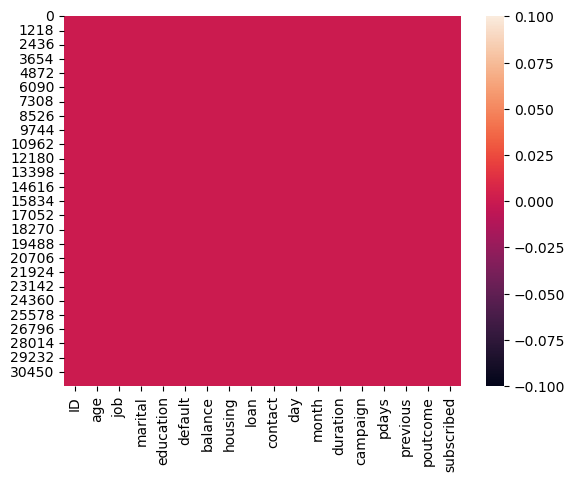

In [175]:
sns.heatmap(df.isnull())

No null data is present in dataset (df)

In [176]:
df.describe()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,22.956520,4.332923,1.167220,1.225013,0.018485,1363.890258,0.555629,0.162132,0.644642,15.835466,5.533131,258.113534,2.765697,39.576042,0.574272,2.566152,0.117389
std,13075.936990,10.621873,3.271868,0.607186,0.749195,0.134700,3028.304293,0.496904,0.368578,0.899480,8.337097,3.004247,257.118973,3.113830,99.317592,2.422529,0.982069,0.321888
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,11218.000000,15.000000,1.000000,1.000000,1.000000,0.000000,73.000000,0.000000,0.000000,0.000000,8.000000,3.000000,104.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,22519.000000,21.000000,4.000000,1.000000,1.000000,0.000000,450.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,33879.500000,30.000000,7.000000,2.000000,2.000000,0.000000,1431.000000,1.000000,0.000000,2.000000,21.000000,8.000000,318.500000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,45211.000000,75.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


key observations-

1- No skewness in datasets as mean is not more then median(50%).

2- outliers are present in data(df) as there is difference in 75% and max in ID,age,job,balance,duration,campaign, pdays, pervious,column

In [177]:
df.skew()

ID             0.005851
age            0.678287
job            0.264817
marital       -0.100071
education      0.199441
default        7.149903
balance        7.995696
housing       -0.223918
loan           1.833474
contact        0.758602
day            0.087185
month         -0.486498
duration       3.199766
campaign       4.873935
pdays          2.642374
previous      49.302348
poutcome      -1.996421
subscribed     2.377445
dtype: float64

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

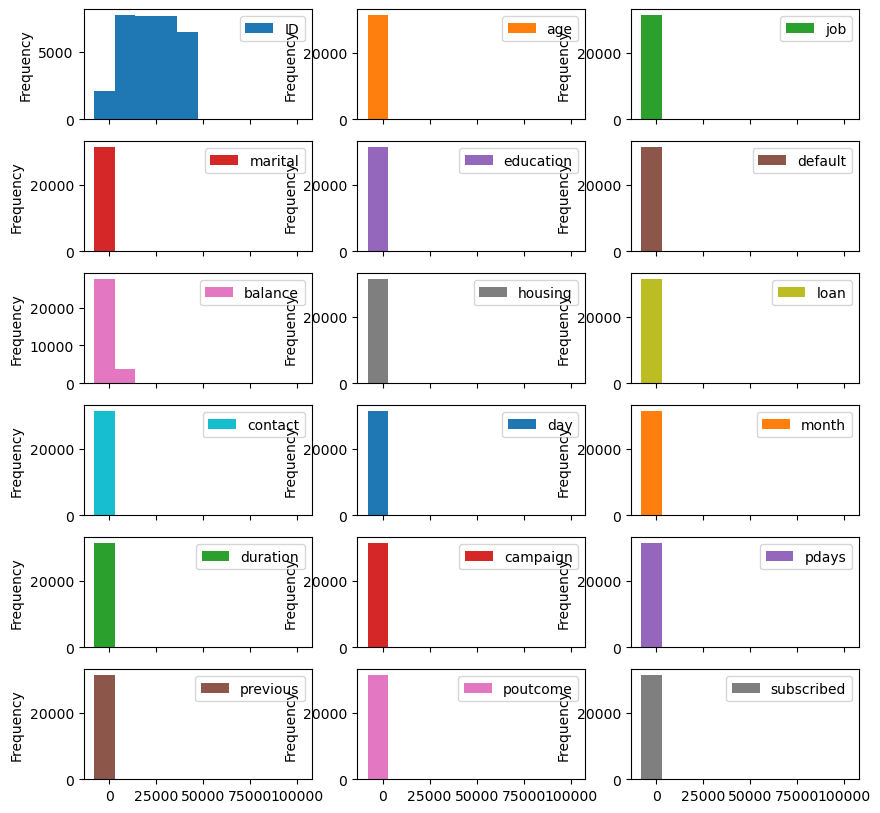

In [178]:
df.plot(kind="hist",subplots=True,layout=(6,3),figsize=(10,10))

From this visualization we get to know that there is no skewness in dataset(df)

ID               AxesSubplot(0.125,0.653529;0.110714x0.226471)
age           AxesSubplot(0.257857,0.653529;0.110714x0.226471)
job           AxesSubplot(0.390714,0.653529;0.110714x0.226471)
marital       AxesSubplot(0.523571,0.653529;0.110714x0.226471)
education     AxesSubplot(0.656429,0.653529;0.110714x0.226471)
default       AxesSubplot(0.789286,0.653529;0.110714x0.226471)
balance          AxesSubplot(0.125,0.381765;0.110714x0.226471)
housing       AxesSubplot(0.257857,0.381765;0.110714x0.226471)
loan          AxesSubplot(0.390714,0.381765;0.110714x0.226471)
contact       AxesSubplot(0.523571,0.381765;0.110714x0.226471)
day           AxesSubplot(0.656429,0.381765;0.110714x0.226471)
month         AxesSubplot(0.789286,0.381765;0.110714x0.226471)
duration             AxesSubplot(0.125,0.11;0.110714x0.226471)
campaign          AxesSubplot(0.257857,0.11;0.110714x0.226471)
pdays             AxesSubplot(0.390714,0.11;0.110714x0.226471)
previous          AxesSubplot(0.523571,0.11;0.110714x0.

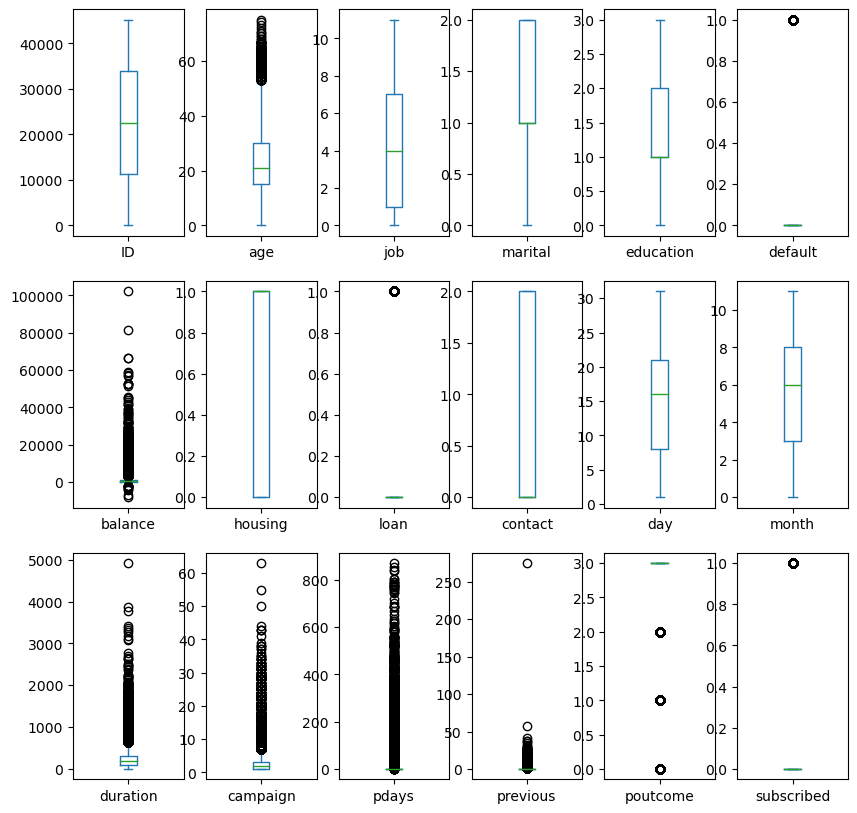

In [179]:
#outliers represantation through boxplot
df.plot(kind="box",subplots=True,figsize=(10,10),layout=(3,6))

In [180]:
df.corr()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,1.000000,0.013245,0.061805,0.086454,0.096480,-0.051521,0.067897,-0.180047,-0.086140,-0.723830,-0.063399,-0.165274,0.007183,-0.103508,0.436148,0.254476,-0.443429,0.296663
age,0.013245,1.000000,-0.020785,-0.406096,-0.102359,-0.016113,0.103283,-0.183755,-0.012631,0.026747,-0.011047,-0.038380,-0.003876,0.005714,-0.021947,0.005749,0.006468,0.024469
job,0.061805,-0.020785,1.000000,0.066124,0.170347,-0.005217,0.020638,-0.125347,-0.039049,-0.078253,0.020951,-0.089384,0.002694,0.001469,-0.022552,-0.003032,0.007101,0.038921
marital,0.086454,-0.406096,0.066124,1.000000,0.107547,-0.009591,0.003487,-0.017846,-0.041654,-0.040180,-0.007686,-0.003834,0.011544,-0.009394,0.019741,0.012717,-0.019770,0.046043
education,0.096480,-0.102359,0.170347,0.107547,1.000000,-0.006774,0.065176,-0.095376,-0.045950,-0.112000,0.017902,-0.055967,0.003842,0.006142,-0.001566,0.015280,-0.019007,0.066051
default,-0.051521,-0.016113,-0.005217,-0.009591,-0.006774,1.000000,-0.069422,-0.011823,0.081567,0.014053,0.009996,0.004694,-0.010849,0.018538,-0.029622,-0.015877,0.035067,-0.020168
balance,0.067897,0.103283,0.020638,0.003487,0.065176,-0.069422,1.000000,-0.067466,-0.083631,-0.024083,0.003461,0.023056,0.024274,-0.012032,0.001789,0.013843,-0.019629,0.050807
housing,-0.180047,-0.183755,-0.125347,-0.017846,-0.095376,-0.011823,-0.067466,1.000000,0.036244,0.195103,-0.025666,0.271442,0.003021,-0.021076,0.118790,0.034231,-0.092677,-0.141092
loan,-0.086140,-0.012631,-0.039049,-0.041654,-0.045950,0.081567,-0.083631,0.036244,1.000000,-0.009213,0.014769,0.024186,-0.012781,0.009340,-0.020078,-0.009258,0.010919,-0.072266
contact,-0.723830,0.026747,-0.078253,-0.040180,-0.112000,0.014053,-0.024083,0.195103,-0.009213,1.000000,-0.027046,0.362934,-0.016503,0.022666,-0.245076,-0.141098,0.272083,-0.150051


<AxesSubplot:>

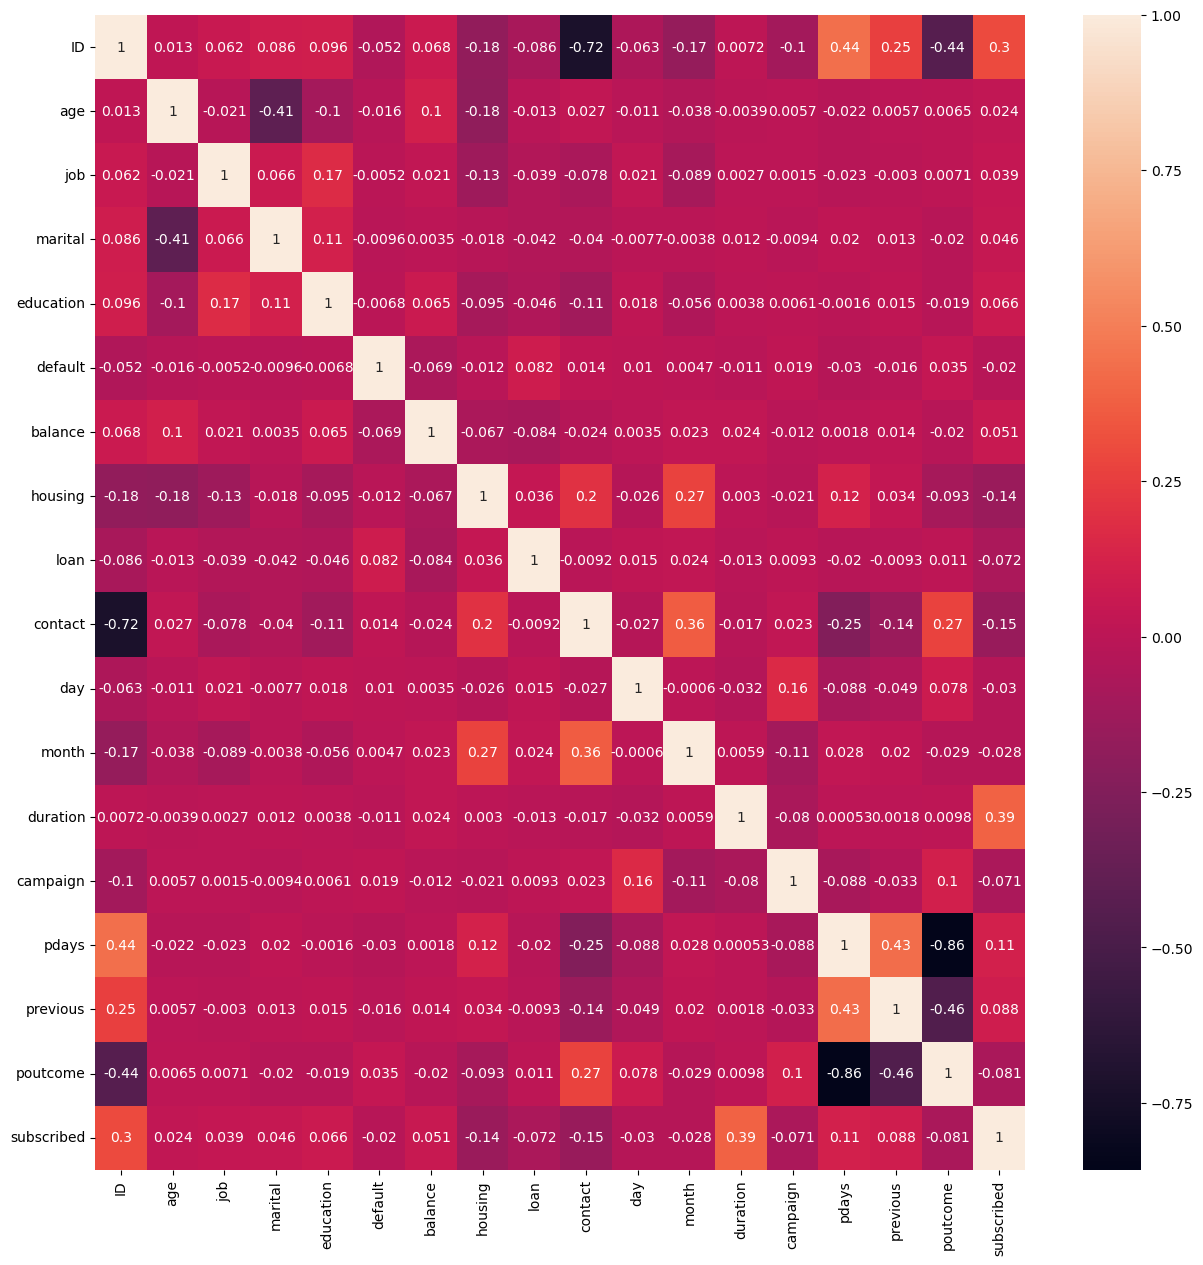

In [181]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

No negative correlation of Subscribed columns with any other columns

Removing outliers

In [182]:
from scipy.stats import zscore

In [183]:
z=np.abs(zscore(df))

In [184]:
z

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,0.271192,1.416296,1.324317,0.275405,2.369229,0.137234,0.187933,1.118201,0.439893,0.395076,0.379579,1.154007,0.832754,0.245906,0.408555,0.237059,0.441777,0.364694
1,1.377516,0.937375,2.037729,0.275405,0.300345,0.137234,0.449397,1.118201,0.439893,0.716695,0.499526,0.177462,0.649957,0.245906,0.408555,0.237059,0.441777,0.364694
2,0.554001,1.313962,0.815167,0.275405,0.300345,0.137234,0.156159,0.894294,0.439893,0.716695,0.259631,0.177462,0.070449,0.567059,0.408555,0.237059,0.441777,0.364694
3,1.636469,1.510443,0.101755,1.922374,1.034442,0.137234,0.635055,1.118201,0.439893,0.716695,0.739422,0.155405,2.368149,0.567059,0.447299,1.001336,0.576498,2.742026
4,0.556606,0.937375,1.426448,0.275405,0.300345,0.137234,0.411091,0.894294,0.439893,0.716695,1.419637,0.843197,0.474054,0.567059,0.408555,0.237059,0.441777,0.364694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,1.064493,1.125669,0.101755,1.371563,1.034442,0.137234,0.450388,0.894294,0.439893,0.716695,0.460055,0.821140,0.552724,0.245906,0.408555,0.237059,0.441777,0.364694
31643,1.347078,1.133856,0.101755,1.922374,1.034442,0.137234,0.324903,1.118201,2.273280,0.716695,1.299690,0.155405,0.699635,0.245906,0.408555,0.237059,0.441777,2.742026
31644,0.218265,0.843228,0.101755,1.371563,1.034442,0.137234,0.347358,1.118201,0.439893,0.716695,1.059794,1.508931,0.859979,0.075247,0.408555,0.237059,0.441777,0.364694
31645,1.223031,1.510443,1.426448,0.275405,0.300345,0.137234,0.376088,0.894294,0.439893,0.395076,0.100212,0.821140,0.918319,1.359859,2.994723,4.716521,2.613048,0.364694


In [185]:
Threashold=3
print(np.where(z>3))

(array([   10,    21,    26, ..., 31622, 31645, 31646], dtype=int64), array([ 5, 13,  6, ..., 14, 15, 12], dtype=int64))


In [186]:
df_new=df[(z<3).all(axis=1)]

In [187]:
df_new

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,38,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,40576,13,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,15320,9,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,43962,39,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,29842,13,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,12109,25,4,2,1,0,2968,0,0,2,20,6,30,4,-1,0,3,0
31641,9476,19,9,2,2,0,1309,0,0,2,6,6,442,2,-1,0,3,0
31642,36483,11,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0
31643,40178,35,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1


In [188]:
df=df_new

In [189]:
df.shape

(27584, 18)

In [190]:
x=df.iloc[:,0:-1]

In [191]:
x.shape

(27584, 17)

In [192]:
y=df.iloc[:,-1]

In [193]:
y.shape

(27584,)

In [194]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.33,random_state=42)

In [195]:
xtrain.shape

(18481, 17)

In [196]:
ytrain.shape

(18481,)

In [197]:
lg=LogisticRegression()

In [198]:
lg

LogisticRegression()

In [199]:
lg.fit(xtrain,ytrain)

LogisticRegression()

In [200]:
lg.score(xtrain,ytrain)

0.8928088306909799

In [201]:
lpred=lg.predict(xtest)

In [202]:
print("accuracy acore = ",accuracy_score(ytest,lpred))

accuracy acore =  0.8926727452488191


In [203]:
print("Confusion Matrix = ",confusion_matrix(ytest,lpred))

Confusion Matrix =  [[7971  187]
 [ 790  155]]


In [204]:
print(classification_report(ytest,lpred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      8158
           1       0.45      0.16      0.24       945

    accuracy                           0.89      9103
   macro avg       0.68      0.57      0.59      9103
weighted avg       0.86      0.89      0.87      9103



In [205]:
knn=KNeighborsClassifier()

In [206]:
knn

KNeighborsClassifier()

In [207]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [208]:
kpred=knn.predict(xtest)

In [209]:
print("accuracy acore = ",accuracy_score(ytest,kpred))
print("Confusion Matrix = ",confusion_matrix(ytest,kpred))
print(classification_report(ytest,kpred))

accuracy acore =  0.9044271119411184
Confusion Matrix =  [[7872  286]
 [ 584  361]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      8158
           1       0.56      0.38      0.45       945

    accuracy                           0.90      9103
   macro avg       0.74      0.67      0.70      9103
weighted avg       0.89      0.90      0.90      9103



In [210]:
x1=pd.read_csv("bank_test.csv")

In [211]:
x1

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [212]:
x1['age']=le.fit_transform(x1['age'])
x1['job']=le.fit_transform(x1['job'])
x1['marital']=le.fit_transform(x1['marital'])
x1['education']=le.fit_transform(x1['education'])
x1['default']=le.fit_transform(x1['default'])
x1['housing']=le.fit_transform(x1['housing'])
x1['loan']=le.fit_transform(x1['loan'])
x1['contact']=le.fit_transform(x1['contact'])
x1['month']=le.fit_transform(x1['month'])
x1['poutcome']=le.fit_transform(x1['poutcome'])


In [213]:
x1

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,14,7,1,1,0,118,1,0,0,15,8,20,6,-1,0,3
1,40403,60,5,0,0,0,2787,0,0,1,1,5,372,1,-1,0,3
2,3709,13,6,2,2,0,144,1,0,2,16,8,676,1,-1,0,3
3,37422,39,7,2,0,0,3777,1,0,1,13,8,65,2,-1,0,3
4,12527,27,1,0,1,0,-705,0,1,2,3,5,111,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,21,4,1,2,0,45,0,0,0,28,1,148,4,-1,0,3
13560,11743,36,1,1,0,0,2281,1,0,2,20,6,158,1,-1,0,3
13561,28292,17,5,1,0,0,285,1,0,0,29,4,136,1,-1,0,3
13562,45163,11,0,2,1,0,464,0,0,0,9,9,208,2,91,3,2


In [214]:
xpred=knn.predict(x1)

In [215]:
xpred

array([0, 0, 1, ..., 0, 0, 0])

In [216]:
x2pred=lg.predict(x1)

In [217]:
x2pred

array([0, 0, 0, ..., 0, 0, 0])

In [218]:
x1['knn outcomes of subscribed']=xpred

In [219]:
x1['lg outcomes of subscribed']=x2pred

In [220]:
x1

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,knn outcomes of subscribed,lg outcomes of subscribed
0,38441,14,7,1,1,0,118,1,0,0,15,8,20,6,-1,0,3,0,0
1,40403,60,5,0,0,0,2787,0,0,1,1,5,372,1,-1,0,3,0,0
2,3709,13,6,2,2,0,144,1,0,2,16,8,676,1,-1,0,3,1,0
3,37422,39,7,2,0,0,3777,1,0,1,13,8,65,2,-1,0,3,0,0
4,12527,27,1,0,1,0,-705,0,1,2,3,5,111,1,-1,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,21,4,1,2,0,45,0,0,0,28,1,148,4,-1,0,3,0,0
13560,11743,36,1,1,0,0,2281,1,0,2,20,6,158,1,-1,0,3,0,0
13561,28292,17,5,1,0,0,285,1,0,0,29,4,136,1,-1,0,3,0,0
13562,45163,11,0,2,1,0,464,0,0,0,9,9,208,2,91,3,2,0,0


The model is predicting the subscription of new data set(x1)
hence model is working fine